## Linear Models and non-linear features
### Two class classification dataset in which classes are not linearly separable

In [6]:
%matplotlib inline

Text(0,0.5,'Feature 1')

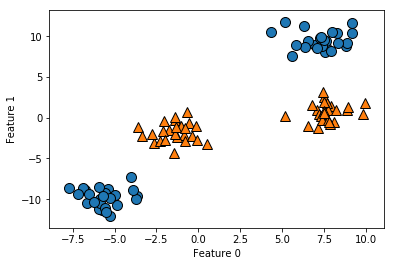

In [7]:
import mglearn
import matplotlib.pyplot as plt
# from sklearn.datasets import make_blobs

X, y = make_blobs(centers = 4, random_state = 8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Decision Boundary by a Linear SVM

Text(0,0.5,'Feature 1')

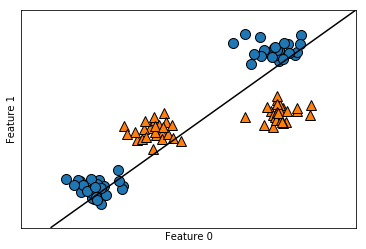

In [9]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Expanding by adding a third feature derived from feature 1

Text(0.5,0,'feature1 ** 2')

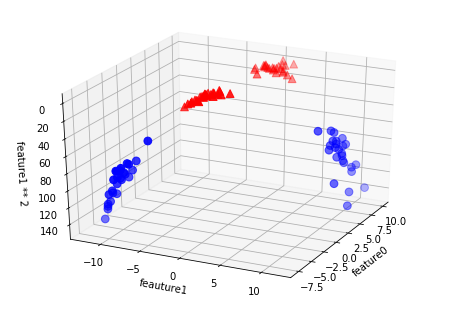

In [12]:
import numpy as np

# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d # mplot3d provides some basic 3D plotting (scatter, surf, line, mesh) tools.

figure = plt.figure()

# visualize in 3D
ax = Axes3D(figure, elev = -152, azim = -26)

# plot first all the points with y == 0, then all with y == 1
mask = y == 0

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c = 'b', cmap = mglearn.cm2, s = 60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c = 'r', marker = '^', cmap = mglearn.cm2, s = 60)

ax.set_xlabel("feature0")
ax.set_ylabel("feauture1")
ax.set_zlabel("feature1 ** 2")

## Decision boundary by a linear SVM on expanded three dimensional dataset

Text(0.5,0,'feature1 ** 2')

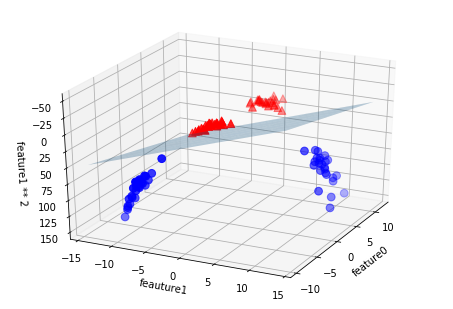

In [16]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# showing linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev = -152, azim = -26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride = 8, cstride = 8, alpha = 0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c = 'b', cmap = mglearn.cm2, s = 60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c = 'r', marker = '^', cmap = mglearn.cm2, s = 60)

ax.set_xlabel("feature0")
ax.set_ylabel("feauture1")
ax.set_zlabel("feature1 ** 2")

## The kernel trick (understanding SVMs)
### decision boundary and support vectors found by an SVM with RBF kernel

Text(0,0.5,'Feature 1')

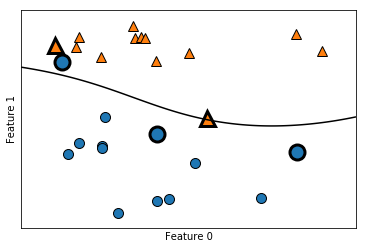

In [18]:
from sklearn.svm import SVC 

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel = 'rbf', C = 10, gamma = 0.1).fit(X, y)

mglearn.plots.plot_2d_separator(svm, X, eps = .5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# plotting support vectors
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s = 15, markeredgewidth = 3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Tuning SVM parameters (decision boundaries and SVs for different settings of the parameters C and gamma)

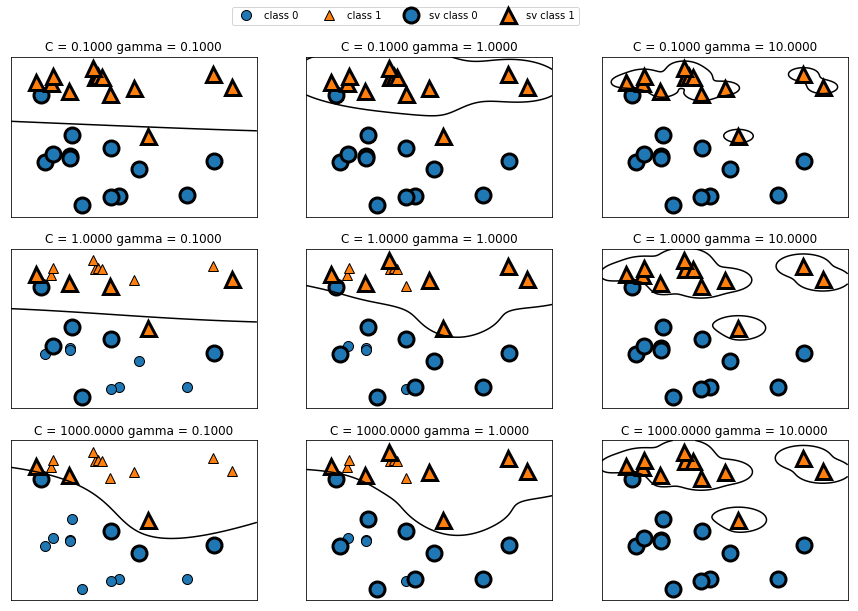

In [20]:
fig, axes = plt.subplots(3, 3, figsize = (15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C = C, log_gamma = gamma, ax = a)

axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol = 4, loc = (.9, 1.2)) 

## Analyzing SVMs on breast_cancer dataset


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63
